In [15]:
#Importing the necessary packages
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Lambda = splot.apStarWavegrid()

# ApVisit Files

Bovy says the first input is location id....ITS NOT!! It is, in fact, the plate id.

In [ ]:
import apogee.tools.read as apread
spec = apread.apVisit(6218, 56168, 148, ext=1, header=False)
specerr = apread.apVisit(6218, 56168, 148, ext=2, header=False)
wave = apread.apVisit(6218, 56168, 148, ext=4, header=False)
header = apread.apVisit(6218, 56168, 148, ext=1, header=True)[1]

In [ ]:
from apogee.spec import continuum
cont = continuum.fitApvisit(spec, specerr, wave)
specnorm = spec/cont

In [ ]:
plt.plot(wave, spec)
plt.plot(wave, cont, lw=2, color='r')
plt.show()
plt.plot(wave, specnorm)
plt.show()

In [ ]:
spectest2 = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
spectest2 #I suppressed the output here as it was really longo

In [63]:
spec = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[3]
header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
spectest2 = apread.apStar(4586,'2M03434449+3143092',ext=4,header=False)[3]

In [86]:
header

(None, 
 SIMPLE  =                    T /image conforms to FITS standard
 BITPIX  =                   16 /bits per data value
 NAXIS   =                    0 /number of axes
 EXTEND  =                    T /file may contain extensions
 DATE    = '2016-01-26'         / Creation UTC (CCCC-MM-DD) date of FITS header
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H
 OBJID   = '2M03434449+3143092' / Object ID
 J       =              12.3230 / 2MASS J magnitude
 H       =              10.7850 / 2MASS H magnitude
 K       =              9.53800 / 2MASS Ks magnitude
 TARG1   =          -2147352576 / First APOGEE targeting flag (bitwise, see docs)
 TARG2   =          -2147475456 / Second APOGEE targeting flag (bitwise, see docs
 TARG3   =                    0 / Third APOGEE targeting flag (bitwise, see docs)
 SURVEY  = 'apogee  '           / Survey name (for targeting flags)
 TELESCOP= '

In [92]:
visit = header[1]['NVISITS']
vhelio = header[1]['VHELIO']
BC = header[1]['BC1']

(500, 1200)

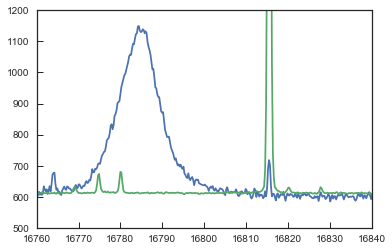

In [44]:
plt.plot(Lambda,spec)
plt.plot(Lambda,spectest2+600)
plt.xlim(16760,16840)
plt.ylim(500,1200)

(0, 6700)

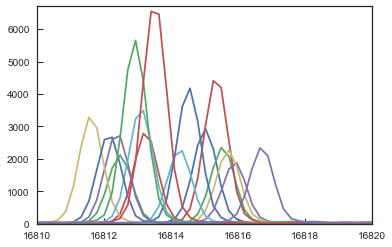

In [56]:
for i in range(visit):
    spectest3 = apread.apStar(4586,'2M03434449+3143092',ext=4,header=False)[i+2]
    plt.plot(Lambda,spectest3)
plt.xlim(16810,16820)
plt.ylim(0,6700)

(500, 1200)

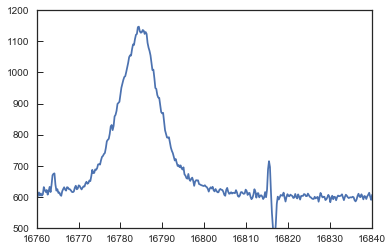

In [65]:
for i in range(visit):
    spectest4 = 0
    spectest3 = apread.apStar(4586,'2M03434449+3143092',ext=4,header=False)[i+2]
    spectest4 = spectest4+spectest3
spectest4 = spectest4/visit
spectrum = spec - spectest4
#plt.plot(Lambda,spectest4+600)
plt.plot(Lambda,spectrum)
plt.xlim(16760,16840)
plt.ylim(500,1200)

In [124]:
c = 299792
n = 11
rydberg = 1.0973731568539*(10**7)
electron = 9.10938356*(10**-31)
nucleus = 1.672621898*(10**-27)
fracryd = rydberg/(1+(electron/nucleus))
vacuum = fracryd*((1./16.)-(1./(float(n**2))))
lambda_obs = 1/vacuum
    
calculated_point1 = lambda_obs*(1-((vhelio)/c))
diff2 = (lambda_obs-calculated_point1)*(10**10)
diff2

26.48044490739747

(0, 3000)

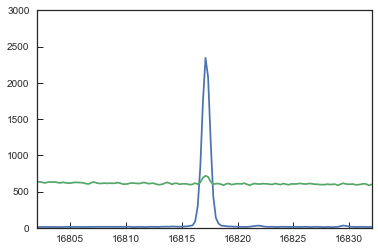

In [115]:
specc = apread.apStar(4586,'2M03434449+3143092',ext=4,header=False)[3]
plt.plot(Lambda+diff2,specc)
plt.plot(Lambda+diff2,spec)
plt.xlim(16802,16832)
plt.ylim(0,3000)

(16802, 16832)

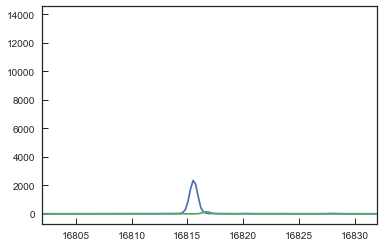

In [98]:
plt.plot(Lambda,specc)
plt.plot(Lambda,spectest4)
plt.xlim(16802,16832)
#plt.ylim(500,800)

(500, 1500)

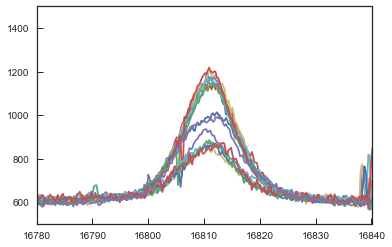

In [126]:
header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
nvisits = header[1]['NVISITS']
for i in range(nvisits):
    specn = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[i+2]
    plt.plot(Lambda+diff2,specn)
plt.xlim(16780,16840)
plt.ylim(500,1500)

In [129]:
Lambda

array([ 15100.80154164,  15101.01016837,  15101.21879797, ...,
        16999.33764336,  16999.57249951,  16999.80735891])

In [130]:
Lambda+diff2

array([ 15127.28198655,  15127.49061327,  15127.69924288, ...,
        17025.81808827,  17026.05294442,  17026.28780381])

(500, 1200)

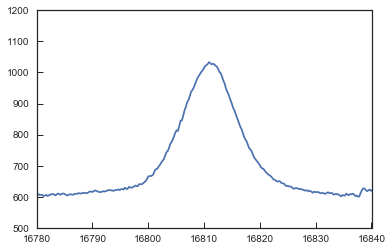

In [135]:
header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
nvisits = header[1]['NVISITS']
alpha = 0
for i in range(nvisits):
    specn = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[i+2]
    alpha = alpha + specn
plt.plot(Lambda+diff2,alpha/nvisits)
plt.xlim(16780,16840)
plt.ylim(500,1200)